In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)  

In [268]:
df = pd.read_csv('building_metadata.csv')

In [269]:
df.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


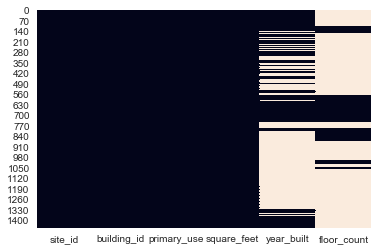

In [270]:
sns.heatmap(df.isnull(), cbar=False)

In [271]:
df.drop(['year_built', 'floor_count'], axis=1, inplace=True)

In [272]:
df.drop('site_id', axis=1, inplace=True)
df.head()

,building_id,primary_use,square_feet
0,0,Education,7432
1,1,Education,2720
2,2,Education,5376
3,3,Education,23685
4,4,Education,116607


In [273]:
df_meter = pd.read_csv('meter_dummies_final.csv')

In [274]:
df_meter.drop('timestamp', axis = 1, inplace=True)
df_meter.head()

,building_id,meter,meter_reading,site_id,month,hour,weekday,holiday,0,1,2,3,air_temperature,dew_temperature,wind_speed
0,0,0,0.0,0,1,0,4,True,1,0,0,0,25.0,20.0,0.0
1,1,0,0.0,0,1,0,4,True,1,0,0,0,25.0,20.0,0.0
2,2,0,0.0,0,1,0,4,True,1,0,0,0,25.0,20.0,0.0
3,3,0,0.0,0,1,0,4,True,1,0,0,0,25.0,20.0,0.0
4,4,0,0.0,0,1,0,4,True,1,0,0,0,25.0,20.0,0.0


In [275]:
building_mean = df_meter.groupby('building_id')['meter_reading'].mean()

In [276]:
df['mean_meter'] = building_mean

In [277]:
df.head()

,building_id,primary_use,square_feet,mean_meter
0,0,Education,7432,42.925954
1,1,Education,2720,21.943047
2,2,Education,5376,4.265011
3,3,Education,23685,69.039695
4,4,Education,116607,286.228782


In [278]:
df['mean_meter'] = np.where(df['mean_meter'] >= 25000, 25000, df['mean_meter'])

In [196]:
# Continue from here to KNN Test 


In [279]:
# Test


In [9]:
#merged df's
merged = pd.merge(df, df_meter)

In [10]:
#creates dummies for primary use category 
merged = pd.concat([merged, pd.get_dummies(merged['primary_use'])], axis=1)

In [11]:
merged.drop('primary_use', axis = 1, inplace=True)

In [12]:
merged.head()

,building_id,square_feet,meter,meter_reading,site_id,month,hour,weekday,holiday,0,1,2,3,air_temperature,dew_temperature,wind_speed,Education,Entertainment/public assembly,Food sales and service,Healthcare,Lodging/residential,Manufacturing/industrial,Office,Other,Parking,Public services,Religious worship,Retail,Services,Technology/science,Utility,Warehouse/storage
0,0,7432,0,0.0,0,1,0,4,True,1,0,0,0,25.0,20.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,7432,0,0.0,0,1,1,4,True,1,0,0,0,24.4,21.1,1.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,7432,0,0.0,0,1,2,4,True,1,0,0,0,22.8,21.1,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,7432,0,0.0,0,1,3,4,True,1,0,0,0,21.1,20.6,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,7432,0,0.0,0,1,4,4,True,1,0,0,0,20.0,20.0,2.6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
merged.drop(['building_id', 'meter'], axis = 1, inplace=True)

,square_feet,meter_reading,site_id,month,hour,weekday,holiday,0,1,2,...,Office,Other,Parking,Public services,Religious worship,Retail,Services,Technology/science,Utility,Warehouse/storage
0,7432,0.0,0,1,0,4,True,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7432,0.0,0,1,1,4,True,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7432,0.0,0,1,2,4,True,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7432,0.0,0,1,3,4,True,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7432,0.0,0,1,4,4,True,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## KNN Testing 
#### Feature Engineering to break down the building sites into more manageable groups.  KNN clustering found 8 

In [280]:
df.drop(['building_id', 'primary_use'], axis=1, inplace=True)

In [281]:
df.head()

,square_feet,mean_meter
0,7432,42.925954
1,2720,21.943047
2,5376,4.265011
3,23685,69.039695
4,116607,286.228782


In [282]:
df.describe()


,square_feet,mean_meter
count,1449.000000,1449.000000
mean,92111.776398,342.204718
std,110769.950997,1363.963168
min,283.000000,0.000400
25%,23012.000000,28.545048
50%,57673.000000,84.672576
75%,115676.000000,239.155932
max,875000.000000,25000.000000


In [244]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [245]:
df_avg = df[df['mean_meter'] <= 250000]

In [246]:
df_avg.shape

(1448, 2)

In [247]:
scaler = StandardScaler()

In [248]:
scaler.fit(df_avg)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [249]:
scaled_features = scaler.transform(df_avg)

In [250]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns)
df_feat.head()

,square_feet,mean_meter
0,-0.764213,-0.232699
1,-0.806821,-0.249951
2,-0.782804,-0.264486
3,-0.617245,-0.211229
4,0.223001,-0.032659


In [251]:
kmeans = KMeans()

In [252]:
kmeans.fit(df_feat)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [253]:
kmeans.cluster_centers_

array([[ 0.03573487, -0.07495325],
       [-0.11303114, 19.6058818 ],
       [ 2.89735764,  0.31064804],
       [ 0.85384825,  1.58944401],
       [ 3.77110115,  8.20981324],
       [ 6.26233827,  0.99684007],
       [ 1.06437167,  0.08057367],
       [-0.59275871, -0.21336355]])

In [254]:
df_avg['building_groups'] = kmeans.predict(df_feat)

/Users/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


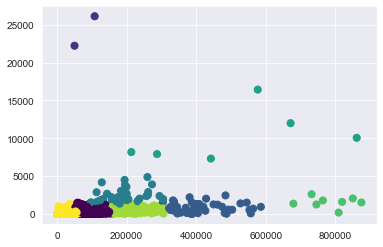

In [260]:
plt.scatter(df_avg['square_feet'], df_avg['mean_meter'], c=df_avg['building_groups'], s=50, cmap='viridis')

### DF Clustering 

In [283]:
# Using the already scaled scaler to transform the original DF now 
df_scaled_features = scaler.transform(df)

In [285]:
#New DF 
df_features = pd.DataFrame(df_scaled_features,columns=df.columns)
df_features.head()

,square_feet,mean_meter
0,-0.764213,-0.232699
1,-0.806821,-0.249951
2,-0.782804,-0.264486
3,-0.617245,-0.211229
4,0.223001,-0.032659


In [286]:
df['building_groups'] = kmeans.predict(df_features)

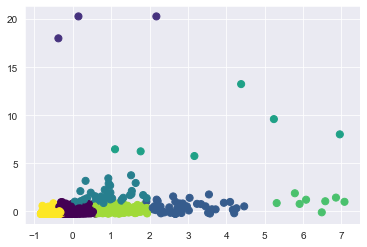

In [287]:
plt.scatter(df_features['square_feet'], df_features['mean_meter'], c=df['building_groups'], s=50, cmap='viridis')